## File to understand oscillating F2B on off peak periods.

In [34]:
from csv import reader
from matplotlib import pyplot

from data import Data
from data import Data
from likelihood import (
    compute_likelihood_blocks,
    read_parameters,
)

In [2]:
PATHS = "data/AVL-AFC-2015/"
station_origin = "VINCENNES"
station_destination = "LA_DEFENSE_GRANDE_ARCHE"
date = "2015-03-16"
direction = "west"
distributed_speed = False
time_distribution = True

In [3]:
data = Data(PATHS, date, direction, station_origin, station_destination)


param = read_parameters()
data = Data(PATHS, date, direction, station_origin, station_destination)


data.compute_feasible_runs()

(
    precomputed_likelihood_blocks,
    walking_distance_entrance,
    walking_distance_exit,
) = compute_likelihood_blocks(data, param, distributed_speed, time_distribution)


Computing feasible runs...


100%|██████████| 1333/1333 [00:01<00:00, 968.19it/s] 


Computing blocks...


100%|██████████| 1323/1323 [00:00<00:00, 1580.88it/s]


In [9]:
with open('output/f2b_result_lognormal.csv', 'r') as f:
    csv_reader = reader(f)
    f2b_estimated = list(csv_reader)[0]



In [10]:
feasible_runs = []
for trip_id in data.AFC_df.index:
    try: 
        feasible_runs.append(data.feasible_runs_dict["last_feasible_run", trip_id] - data.feasible_runs_dict["first_feasible_run", trip_id] + 1)
    except KeyError:
        feasible_runs.append(0)

Compute number of trip concerned with each mission

In [90]:
number_of_trips_by_mission = [0 for i in range(len(f2b_estimated))]

for trip_id in data.AFC_df.index:
    try: 
        first_feasible_run = data.feasible_runs_dict["first_feasible_run", trip_id]
        last_feasible_run = data.feasible_runs_dict["last_feasible_run", trip_id]
        for mission in range(first_feasible_run, last_feasible_run +1):
            number_of_trips_by_mission[mission] += 1
    except KeyError:
        continue

[5, 1, 0, 2, 1, 2, 2, 4, 3, 4, 2, 5, 7, 0, 7, 5, 4, 3, 8, 9, 6, 9, 9, 7, 7, 22, 14, 17, 18, 19, 16, 12, 23, 21, 29, 48, 53, 22, 28, 35, 26, 38, 37, 60, 33, 30, 42, 29, 31, 28, 36, 34, 40, 42, 45, 29, 31, 31, 38, 46, 40, 37, 29, 17, 18, 33, 22, 14, 12, 16, 11, 17, 18, 5, 11, 7, 7, 8, 2, 5, 7, 4, 0, 0, 1, 2, 1, 1, 0, 5, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 3, 2, 1, 5, 2, 2, 1, 0, 0, 0, 3, 0, 2, 1, 5, 1, 0, 0, 1, 2, 3, 1, 1, 1, 0, 4, 0, 1, 6, 1, 1, 1, 2, 3, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 3, 3, 1, 2, 0, 1, 2, 2, 6, 3, 1, 0, 0, 0, 1, 2, 3, 0, 1, 3, 1, 2, 0, 1, 3, 2, 2, 6, 2, 1, 8, 10, 3, 1, 2, 2, 2, 4, 3, 11, 9, 10, 8, 13, 10, 5, 3, 9, 6, 7, 6, 13, 7, 3, 8, 10, 7, 7, 3, 9, 3, 6, 1, 7, 3, 2, 2, 7, 14, 6, 2, 9, 6, 10, 4, 9, 3, 2, 6, 7, 3, 5, 9, 5, 6, 13, 7, 10, 5, 4, 7, 7, 2, 3, 4, 8, 1, 6, 2, 5, 0, 1, 12, 7, 11, 5, 7, 4, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]


Get missions with appearent aberrant fail to board probability.

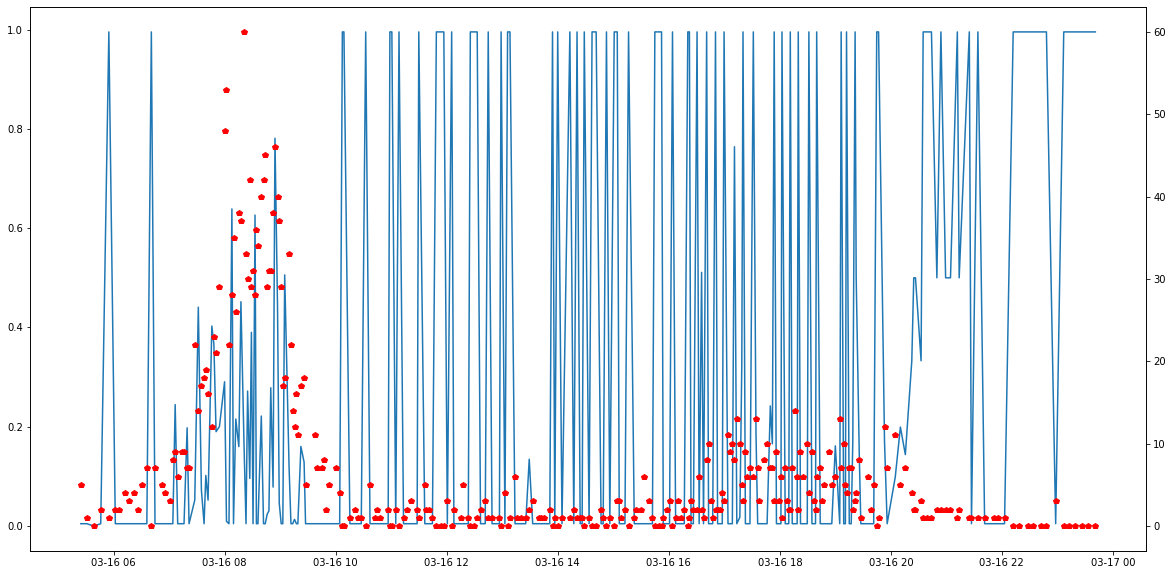

In [96]:
pyplot.rcParams["figure.figsize"] = [20, 10]
fig,ax = pyplot.subplots()
ax.plot(data.AVL_df[data.station_origin + "_departure"], [float(f2b) for f2b in f2b_estimated]) 

ax2=ax.twinx()
ax2.plot(data.AVL_df[data.station_origin + "_departure"], number_of_trips_by_mission, 'rp')
pyplot.show()

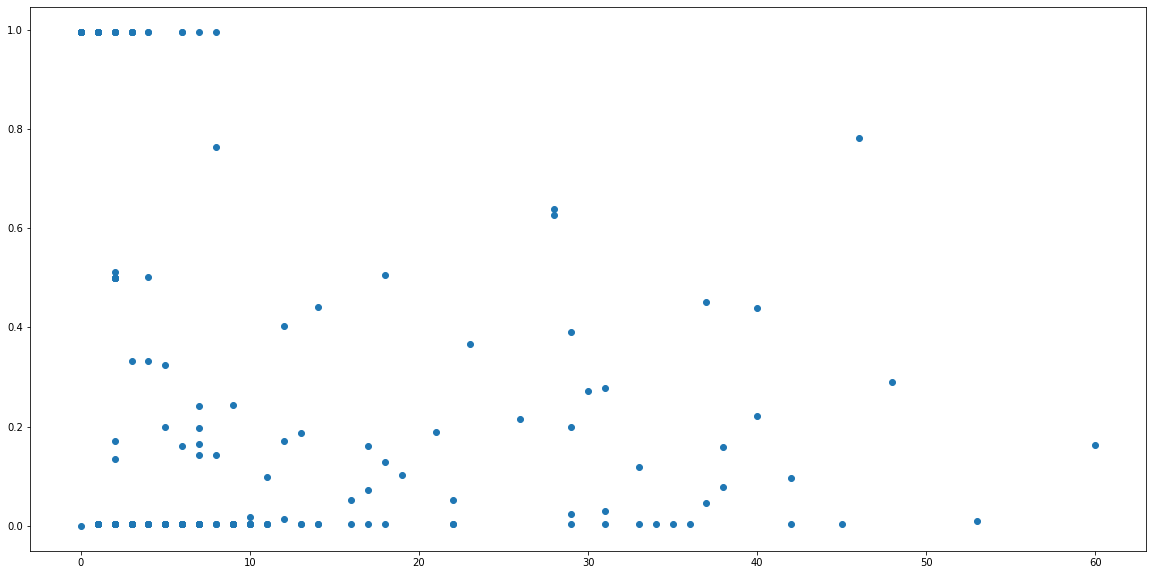

In [99]:
pyplot.rcParams["figure.figsize"] = [20, 10]
pyplot.scatter(number_of_trips_by_mission, [float(f2b) for f2b in f2b_estimated])